<a href="https://colab.research.google.com/github/Sayma-sudo/senulationlab/blob/main/One-Sample%20t-Test%20with%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Mean: 67.58
Hypothesized Mean: 65
T-statistic: 2.3397
Degrees of Freedom: 11
P-value: 0.0392
95% Confidence Interval: (np.float64(65.15), np.float64(70.01))
Decision: Reject H0 (mean is significantly different from 65)


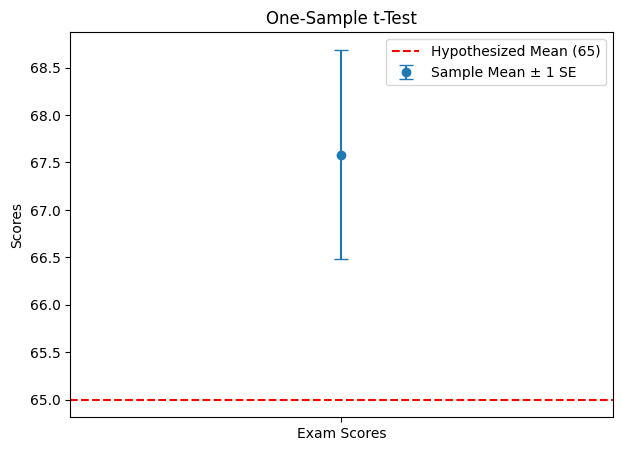

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate dataset (ID = 1060 → k=60 → k%5=0)
np.random.seed(42)
exam_scores = 60 + np.random.randint(0, 15, size=12) + (60 % 5)

# Hypothesized mean
hypothesized_mean = 65

# One-sample t-test
t_stat, p_value = stats.ttest_1samp(exam_scores, hypothesized_mean)

# Sample statistics
sample_mean = np.mean(exam_scores)
n = len(exam_scores)
df = n - 1

# 95% Confidence Interval
ci = stats.t.interval(0.95, df, loc=sample_mean, scale=stats.sem(exam_scores))

# ----- Required Results -----
print("Sample Mean:", round(sample_mean, 2))
print("Hypothesized Mean:", hypothesized_mean)
print("T-statistic:", round(t_stat, 4))
print("Degrees of Freedom:", df)
print("P-value:", round(p_value, 4))
print("95% Confidence Interval:", (round(ci[0], 2), round(ci[1], 2)))

# Decision at α = 0.05
if p_value < 0.05:
    print("Decision: Reject H0 (mean is significantly different from 65)")
else:
    print("Decision: Fail to Reject H0 (no significant difference from 65)")

# Visualization
plt.figure(figsize=(7,5))
plt.errorbar(1, sample_mean, yerr=stats.sem(exam_scores), fmt='o', capsize=5, label='Sample Mean ± 1 SE')
plt.axhline(y=hypothesized_mean, color='r', linestyle='--', label='Hypothesized Mean (65)')
plt.xticks([1], ['Exam Scores'])
plt.ylabel("Scores")
plt.title("One-Sample t-Test")
plt.legend()
plt.show()
